In [1]:


import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:
!ls

c_t.ipynb  test_clean.csv  testset-taska.tsv  testset-taskb.tsv


In [3]:
df = pd.read_csv("testset-taskb.tsv", sep ='\t')

In [4]:
df.head()


,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,60133,#NoPasaran: Unity demo to oppose the far-right...
2,83681,. . . What the fuck did he do this time?
3,65507,@USER Do you get the feeling he is kissing @US...
4,12588,@USER Nigga ware da hits at


In [5]:
df.rename({'tweet':'review'}, axis=1,inplace=True)


In [6]:
df.head()

,id,review
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,60133,#NoPasaran: Unity demo to oppose the far-right...
2,83681,. . . What the fuck did he do this time?
3,65507,@USER Do you get the feeling he is kissing @US...
4,12588,@USER Nigga ware da hits at


In [7]:
z = {'NOT' : 0 ,'OFF' : 1}
df['target'] = df.target.map(z)

AttributeError: 'DataFrame' object has no attribute 'target'

In [8]:
df.head()

,id,review
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,60133,#NoPasaran: Unity demo to oppose the far-right...
2,83681,. . . What the fuck did he do this time?
3,65507,@USER Do you get the feeling he is kissing @US...
4,12588,@USER Nigga ware da hits at


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
id        240 non-null int64
review    240 non-null object
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [10]:


df.target.value_counts()



AttributeError: 'DataFrame' object has no attribute 'target'

In [14]:
df.drop(['subb','subc'],axis=1,inplace=True)

In [11]:
df.head()

,id,review
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,60133,#NoPasaran: Unity demo to oppose the far-right...
2,83681,. . . What the fuck did he do this time?
3,65507,@USER Do you get the feeling he is kissing @US...
4,12588,@USER Nigga ware da hits at


In [13]:
df[df.sentiment == 0].head(10)

,id,review,sentiment
2,16820,Amazon is investigating Chinese employees who ...,0
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0
8,45157,@USER Buy more icecream!!!,0
10,82776,@USER @USER @USER It’s not my fault you suppor...,0
11,42992,@USER What’s the difference between #Kavanaugh...,0
13,54920,@USER @USER @USER It should scare every Americ...,0
14,56392,@USER @USER @USER @USER @USER @USER @USER @USE...,0
15,86735,@USER you are also the king of taste,0
16,95686,#MAGA @USER 🎶 Sing like no one is listening ...,0
17,71446,5/5: @USER The time is right for this House to...,0


In [14]:
df[df.sentiment == 1].head(10)

,id,review,sentiment
0,86426,@USER She should ask a few native Americans wh...,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1
5,97670,@USER Liberals are all Kookoo !!!,1
6,77444,@USER @USER Oh noes! Tough shit.,1
7,52415,@USER was literally just talking about this lo...,1
9,13384,@USER Canada doesn’t need another CUCK! We alr...,1
12,28414,@USER you are a lying corrupt traitor!!! Nobod...,1
19,28195,@USER @USER @USER gun control! That is all the...,1
20,56117,@USER @USER @USER @USER LOL!!! Throwing the ...,1


In [20]:


df['pre_clean_len'] = [len(t) for t in df.review]



In [21]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.review.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)


AttributeError: 'DataFrame' object has no attribute 'sentiment'

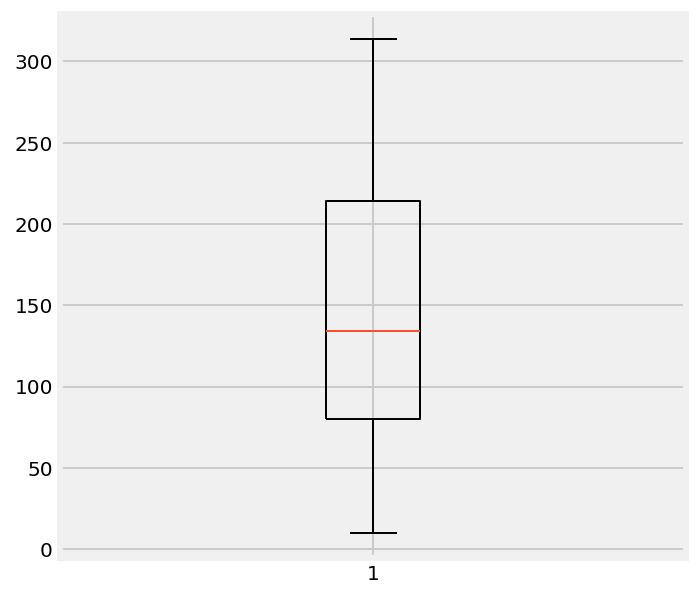

In [22]:


fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()



In [12]:


from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()



In [13]:


import re

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
part3 = r'#[A-Za-z0-9_]+'
combined_pat = r'|'.join((pat1, pat2,part3))
www_pat = r'www.[^ ]+'
url = r'URL'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    
    try:
        bom_removed = text.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = text
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    stripped = re.sub(url, '', stripped)
    
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()



In [14]:
testing = df.review[:100]

In [15]:


test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))



In [16]:
test_result

['democrats support antifa muslim brotherhood ms isis pedophilia child trafficking taxpayer funded abortion election fraud sedition and treason',
 'unity demo to oppose the far right in enough is enough',
 'what the fuck did he do this time',
 'do you get the feeling he is kissing behind so he can humiliate him later',
 'nigga ware da hits at',
 'he is liar like the rest of the',
 'put delauro in police lineup identifying the bag lady she would be picked everytime she has to be proof either conn voters are incompetent to vote or she is part of vast voter fraud conspiracy no one votes for woman that gross',
 'all family friends do not tell me bad shit that your bf gf did to you just to go right back to them',
 'is your accuser try this every time',
 'is that serious holy shit please your fucking assholes do not blame someone for the death of other one she is sad enough for today do not you see it is not fault of none he had an overdose and died end stop wanting someone to blame fuckers'

In [17]:
%%time
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(0,240):
    if( (i+1)%240 == 0 ):
        print ("Tweets has been processed")                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['review'][i]))

Cleaning and parsing the tweets...

Tweets has been processed
CPU times: user 15.6 ms, sys: 3.91 ms, total: 19.5 ms
Wall time: 21.3 ms


In [18]:
len(clean_tweet_texts)

240

In [19]:



clean_df = pd.DataFrame(df.id,columns=['id'])
clean_df['text'] = clean_tweet_texts
#clean_df['target'] = df.target


clean_df.head()

,id,text
0,15923,democrats support antifa muslim brotherhood ms...
1,60133,unity demo to oppose the far right in enough i...
2,83681,what the fuck did he do this time
3,65507,do you get the feeling he is kissing behind so...
4,12588,nigga ware da hits at


In [20]:



clean_df.to_csv('test_clean_b.csv',index=False,encoding='utf-8')


